In [35]:
import numpy as np
import pandas as pd
import copy 
import random as rd
k=3
import matplotlib.pyplot as plt

In [36]:
X = pd.read_csv('kmeans.csv')
print(X)

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


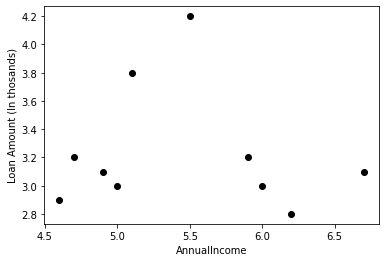

In [37]:
X=X[["X1","X2"]]
plt.scatter(X["X1"],X["X2"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In thosands)')
plt.show()

In [38]:
x1=X['X1'].values
x2=X['X2'].values

In [39]:
x1

array([5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6. ])

In [40]:
x2

array([3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ])

In [41]:
X=np.array(list(zip(x1,x2)))
print(X)

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]


In [42]:
C_x=[6.2,6.6,6.5]
C_y=[3.2,3.7,3.0]

In [43]:
centroid = np.array(list(zip(C_x,C_y)),dtype=np.float32)
print('Initial centroids')
print(centroid.shape)

Initial centroids
(3, 2)


In [44]:
centroid

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]], dtype=float32)

In [45]:
type(centroid)

numpy.ndarray

In [46]:
centroid_old=np.zeros(centroid.shape)
print(centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [47]:
clusters=np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
[0,1,2,0,0,1,2,1,1,0]

[0, 1, 2, 0, 0, 1, 2, 1, 1, 0]

In [49]:
def euclidean(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [50]:
error = (centroid,centroid_old,None)
print(error)

(array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]], dtype=float32), array([[0., 0.],
       [0., 0.],
       [0., 0.]]), None)


In [55]:
iterr=0
while error != 0:
        iterr = iterr + 1
        for i in range(len(X)):
            distances = euclidean(X[i], centroid)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        centroid_old = copy.deepcopy(centroid)
        print("Old Centroid")
        print(centroid_old)
            
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            centroid[p] = np.mean(points, axis=0)
        print(" New Centroids after ", iterr," Iteration \n", centroid)
        error = euclidean(centroid, centroid_old, None)
        print("Error  ... ",error)
        print("Data points belong to which cluster")
        print(clusters)
        print("*******")